# Projeto - Relatório de valor de fechamento de mercado do Bitcoin enviado por e-mail

### Objetivo do projeto: 
Automatizar o envio de e-mail com o valor de fechamento de mercado do Bitcoin, Dólar/BRL e Índice IBOVESPA, com o envio da variância e gráfico de até 3 meses que são atualizados a cada envio.

OBS: O horário de fechamento do mercado gira em torno das 18hrs, rodar o projeto antes deste horário o algoritmo entregará o valor de fechamento do dia anterior.

- Dados importados diretamente do Yahoo Finance
- MPL CyberPunk usado para estilização
- Envio de email com SMTPlib

## Passos:
- 1º - Download e Import das bibliotecas usadas
- 2º - Puxar histórico de cotações do ativo
- 3º - Trataento de dados - Excluir dados nulos
- 4º - Visualização dos dados com gráfico em linha
- 5º - Calculo de retornos
- 6º - Envio por Gmail


## Passo 1 - Baixar e Importar bibliotecas

In [432]:
!pip install mplcyberpunk

In [433]:
!pip install yfinance==0.2.40

In [434]:
import yfinance as yf

In [435]:
import pandas as pd

In [436]:
import matplotlib.pyplot as plt

In [437]:
import mplcyberpunk

# Passo 2 - Pegar histórico de Cotações

In [438]:
tickers = ["^BVSP", "BRL=X", "BTC-USD"]

In [439]:
dados_mercado = yf.download(tickers, period = "3mo")
dados_mercado = dados_mercado["Adj Close"] # Quero apenas o fechamento ajustado
dados_mercado.head()

[*********************100%%**********************]  3 of 3 completed


Ticker,BRL=X,BTC-USD,^BVSP
Date,,,
2024-06-20,5.422400,NaN,120446.0
2024-06-21,5.452400,64096.199219,121341.0
2024-06-22,NaN,64252.578125,NaN
2024-06-23,NaN,63180.796875,NaN
2024-06-24,5.426126,60277.414062,122637.0


# Passo 3 - Tratar os dados - Limpar dados faltantes

In [440]:
dados_mercado = dados_mercado.dropna() # Tiramos os dados vazios

In [441]:
dados_mercado.head()

Ticker,BRL=X,BTC-USD,^BVSP
Date,,,
2024-06-21,5.452400,64096.199219,121341.0
2024-06-24,5.426126,60277.414062,122637.0
2024-06-25,5.389300,61804.640625,122331.0
2024-06-26,5.450700,60811.277344,122641.0
2024-06-27,5.522500,61604.800781,124308.0


In [442]:
dados_mercado.columns = ['DOLAR/BRL', 'BITCOIN/USD', 'IBOVESPA'] # Alteramos os nomes das Colunas
dados_mercado.head()

,DOLAR/BRL,BITCOIN/USD,IBOVESPA
Date,,,
2024-06-21,5.452400,64096.199219,121341.0
2024-06-24,5.426126,60277.414062,122637.0
2024-06-25,5.389300,61804.640625,122331.0
2024-06-26,5.450700,60811.277344,122641.0
2024-06-27,5.522500,61604.800781,124308.0


# Passo 4 - Criamos nosso gráfico de visualização inicial

In [443]:
plt.style.use('cyberpunk') #Escolhemos o tema que iremos querer

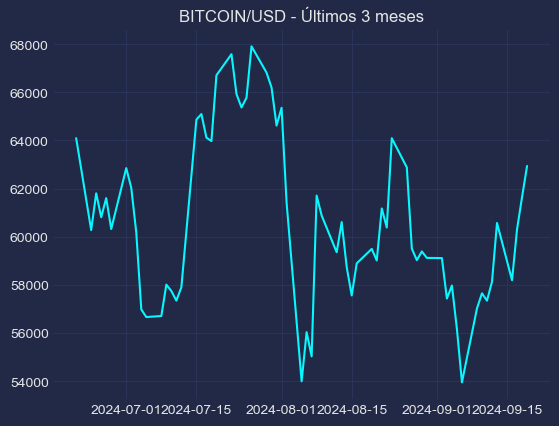

In [444]:
plt.plot(dados_mercado["BITCOIN/USD"])
plt.title('BITCOIN/USD - Últimos 3 meses')

plt.savefig(r'C:\Users\Washington\Documents\Projeto Python - Relatorio Bitcoin\bitcoin3m.png')

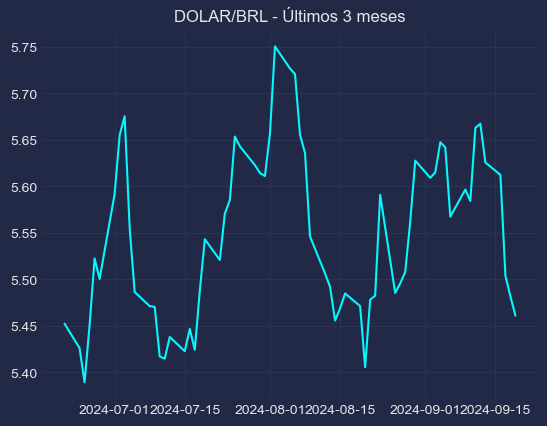

In [445]:
plt.plot(dados_mercado["DOLAR/BRL"])
plt.title('DOLAR/BRL - Últimos 3 meses')

plt.savefig(r'C:\Users\Washington\Documents\Projeto Python - Relatorio Bitcoin\dolar3m.png')

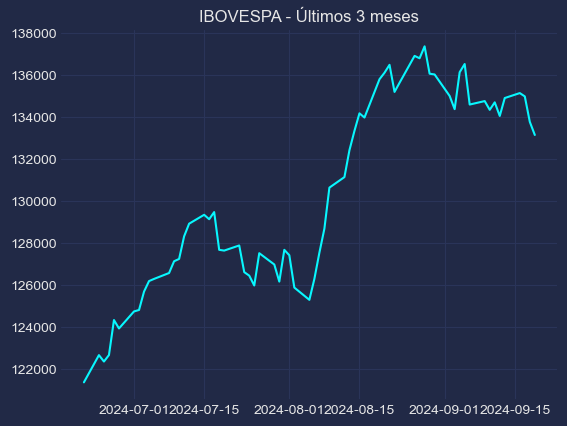

In [446]:
plt.plot(dados_mercado["IBOVESPA"])
plt.title('IBOVESPA - Últimos 3 meses')

plt.savefig(r'C:\Users\Washington\Documents\Projeto Python - Relatorio Bitcoin\ibovespa3m.png')

# Passo 5 - Calcular retornos diários

In [447]:
retornos_diarios = dados_mercado.pct_change() # Puxamos os retornos em porcentagem
# Para puxarmos a informação de uma outra janela de dias usamos -> dados_mercado.pct_change(period = 5) <- Para 5 dias no caso.

retornos_diarios = retornos_diarios.dropna()

retornos_diarios.head()

,DOLAR/BRL,BITCOIN/USD,IBOVESPA
Date,,,
2024-06-24,-0.004819,-0.059579,0.010681
2024-06-25,-0.006787,0.025337,-0.002495
2024-06-26,0.011393,-0.016073,0.002534
2024-06-27,0.013173,0.013049,0.013593
2024-06-28,-0.003984,-0.020853,-0.003226


In [448]:
# Agora fazemos a contagem do retorno por ativo, para o fechamento do último dia.
# Aviso: Caso você rode o código antes das 18h15 (horário de fechamento do mercado), ele mostrará o fechamento do dia anterior.

In [449]:
retorno_dolar = retornos_diarios["DOLAR/BRL"].iloc[-1] # O -1 serve para pegar sempre o último dado
retorno_bitcoin = retornos_diarios["BITCOIN/USD"].iloc[-1]
retorno_ibovespa = retornos_diarios["IBOVESPA"].iloc[-1]

In [450]:
# Transformamos o dado em percentil e arredondamos o número (Trasnformamos em string)

In [451]:
retorno_dolar = f"{retorno_dolar * 100:.2f}"
retorno_bitcoin = f"{retorno_bitcoin * 100:.2f}%"
retorno_ibovespa = f"{retorno_ibovespa * 100:.2f}%"

retorno_bitcoin

'2.09%'

# Passo 6 - Enviar pelo Gmail

- O Gmail passou a usar uma senha específica para aplicativos que desejem acessar a conta, para isso é preciso pegar uma senha de app nas configurações de segurança do gmail.

In [455]:
import smtplib
from email.message import EmailMessage
import mimetypes

In [456]:
# Criação da mensagem

msg = EmailMessage()
msg['Subject'] = 'Assunto'
msg['from'] = 'iago.mont375@gmail.com'
msg['To'] = 'iago.mont375@gmail.com , fabriciosergionogueirafilho@gmail.com'

msg.set_content(f'''Prezado diretor, segue o relatório de mercado:

- O Bitcoin teve o retorno de {retorno_bitcoin}.
- O Dólar teve o retorno de {retorno_dolar}.
- O IBOVESPA teve o retorno de {retorno_ibovespa}.

Segue em anexo a peformance dos ativos nos últimos 3 meses.

Att,
Iago Monteiro


''')

anexo_bitcoin = r"C:\Users\Washington\Documents\Projeto Python - Relatorio Bitcoin\bitcoin3m.png"
anexo_dolar = r"C:\Users\Washington\Documents\Projeto Python - Relatorio Bitcoin\dolar3m.png"
anexo_ibovespa = r"C:\Users\Washington\Documents\Projeto Python - Relatorio Bitcoin\ibovespa3m.png"
# O r no início é para inverter as barras (/)

# Determinar o tipo MIME da imagem
tipo_mime, _ = mimetypes.guess_type(anexo_bitcoin)
tipo_mime, _ = mimetypes.guess_type(anexo_dolar)
tipo_mime, _ = mimetypes.guess_type(anexo_ibovespa)
tipo_mime, sub_tipo = tipo_mime.split('/')

# Adicionando o anexo (imagem)
with open(anexo_bitcoin, 'rb') as f:
    msg.add_attachment(f.read(), maintype=tipo_mime, subtype=sub_tipo, filename='bitcoin3m.png')
    
with open(anexo_dolar, 'rb') as f:
    msg.add_attachment(f.read(), maintype=tipo_mime, subtype=sub_tipo, filename='dolar3m.png')
    
with open(anexo_ibovespa, 'rb') as f:
    msg.add_attachment(f.read(), maintype=tipo_mime, subtype=sub_tipo, filename='ibovespa3m.png')

In [457]:
# Conectando ao servidor SMTP e enviando o e-mail
try:
    # Conectando ao servidor SMTP do Gmail
    with smtplib.SMTP('smtp.gmail.com', 587) as smtp:
        smtp.starttls()  # Inicia a criptografia TLS
        smtp.login('iago.mont375@gmail.com', 'tfpv ojfh waxa njjh')

        # Enviar e-mail
        smtp.send_message(msg)
        print('E-mail enviado com sucesso!')

except Exception as e:
    print(f'Ocorreu um erro: {e}')

E-mail enviado com sucesso!
